### Importing required modules

In [1]:
# Import requests
import requests

# Import BeautifulSoup
from bs4 import BeautifulSoup

# Import NLTK module
import nltk

# Import word_tokenize 
from nltk.tokenize import word_tokenize

# Import POS tagger
from nltk.tag import pos_tag

# Import spacy
import spacy
from spacy import displacy

# Import pretrained models
import en_core_web_sm

### Obtaining text from a website

In [2]:
# send a request to the website
page = requests.get("https://en.wikipedia.org/wiki/Natural_Language_Toolkit")

# Use BeautifulSoup to parse HTML using html5 protocol. It is slower
# but more efficient 
page_content = BeautifulSoup(page.text, "html5lib")

# Now we look for the paragraphs
textContent = []
for i in range(0, 3):
    paragraphs = page_content.find_all("p")[i].text
    textContent.append(paragraphs)

# Join the paragraphs together and replace the `\n` for empty strings
wiki_nltk = " ".join(textContent).replace("\n", "")

In [3]:
wiki_nltk

' The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language. It was developed by Steven Bird and Edward Loper in the Department of Computer and Information Science at the University of Pennsylvania.[5] NLTK includes graphical demonstrations and sample data. It is accompanied by a book that explains the underlying concepts behind the language processing tasks supported by the toolkit,[6] plus a cookbook.[7] NLTK is intended to support research and teaching in NLP or closely related areas, including empirical linguistics, cognitive science, artificial intelligence, information retrieval, and machine learning.[8]NLTK has been used successfully as a teaching tool, as an individual study tool, and as a platform for prototyping and building research systems. There are 32 universities in the US and 25 countries using NLTK in their courses. NLTK 

### NTLK in action

NLTK is the most used platform when working with human language data in Python. It provides more than 50 corpora and lexical resources. It also has libraries to classify, tokenize, and tag texts, among other functions.
It is able to help us with our task of classifying words in verbs, nouns, adjectives. Together they are referred to as parts of speech. And the task of labeling them is called part-of-speech tagging, or POS-tagging.

Let's define a method that takes the text, tokenize it, label the tokens and returns the tuples. Each tuple consists of a word and its tag; the part of the speech that it corresponds to.

In [4]:
def preprocess_text(text):
    """
    This function takes a text. Split it in tokens using word_tokenize. 
    And then tags them using pos_tag from NLTK module.
    It outputs a list of tuples. Each tuple consists of a word and the tag with its 
    part of speech.
    """
    # Get the tokens
    tokens = nltk.word_tokenize(text)
    # Tags the tokens
    tagging = nltk.pos_tag(tokens)
    # Returns the list of tuples
    return tagging

Now, we apply the method to the text.

In [5]:
# Split and label the text
label_text = preprocess_text(wiki_nltk)

And we print the first 20 tuples.

In [82]:
for i in range(0, 40, 5):
    print(label_text[i], label_text[i+1], label_text[i+2], label_text[i+3], label_text[i+4])

('The', 'DT') ('Natural', 'NNP') ('Language', 'NNP') ('Toolkit', 'NNP') (',', ',')
('or', 'CC') ('more', 'JJR') ('commonly', 'RB') ('NLTK', 'NNP') (',', ',')
('is', 'VBZ') ('a', 'DT') ('suite', 'NN') ('of', 'IN') ('libraries', 'NNS')
('and', 'CC') ('programs', 'NNS') ('for', 'IN') ('symbolic', 'JJ') ('and', 'CC')
('statistical', 'JJ') ('natural', 'JJ') ('language', 'NN') ('processing', 'NN') ('(', '(')
('NLP', 'NNP') (')', ')') ('for', 'IN') ('English', 'NNP') ('written', 'VBN')
('in', 'IN') ('the', 'DT') ('Python', 'NNP') ('programming', 'NN') ('language', 'NN')
('.', '.') ('It', 'PRP') ('was', 'VBD') ('developed', 'VBN') ('by', 'IN')


Let's decode some of the [tags](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). DT indicates that the word is a determiner. NN a Noun, singular. NNP a proper noun, singular. CC a coordinating conjunction. JJR an adjective, comparative. RB an adverb. IN a preposition.

How is that pos_tag is able to return all of these tags? 
It uses Probabilistic Methods. Particularly, Conditional Random Fields (CRF) and Hidden Markov Models.
First, the model extracts a set of features of each word called State Features. It bases the decision on characteristics like capitalization of the first letter, presence of numbers or hyphen, suffixes, prefixes, among others. 
The model considers also the label of the previous word in a function called Transition Feature. It will determine the weights of different features functions to maximize the likelihood of the label.

The next step is to perform entity detection. This task will be carried out using a technique called chunking.
Tokenization extracts only "tokens" or words. On the other hand, chunking extract phrases that may have an actual meaning in the text. 
Chunking requires that our text is first tokenized and POS tagged. It uses these tags as inputs. It outputs "chunks" that can indicate entities.

NLTK has several functions that facilitate the process of chunking our text. The mechanism is based on the use of regular expressions to generate the chunks. We can customize these regular expressions using RegexpParser and chunkParser.parse.

First, we need to indicate the rules on how sentences are going to be chuncked.

In [130]:
# Define the rules 
rule = "NP: {<DT>?<JJ>*<NNP>+}" 

Using this rule, we define a chunk parser.

In [131]:
# We define the parser using the rule
parser = nltk.RegexpParser(rule) 

In [132]:
# Apply to the tagged words
result = parser.parse(label_text) 

In [133]:
# Print only the chunks
for entity in result:
    if type(entity) == nltk.tree.Tree:
        print(entity)

(NP The/DT Natural/NNP Language/NNP Toolkit/NNP)
(NP NLTK/NNP)
(NP NLP/NNP)
(NP English/NNP)
(NP the/DT Python/NNP)
(NP Steven/NNP Bird/NNP)
(NP Edward/NNP Loper/NNP)
(NP the/DT Department/NNP)
(NP Computer/NNP)
(NP Information/NNP Science/NNP)
(NP the/DT University/NNP)
(NP Pennsylvania/NNP)
(NP ]/JJ NLTK/NNP)
(NP ]/JJ NLTK/NNP)
(NP NLP/NNP)
(NP NLTK/NNP)
(NP the/DT US/NNP)
(NP NLTK/NNP)
(NP NLTK/NNP)


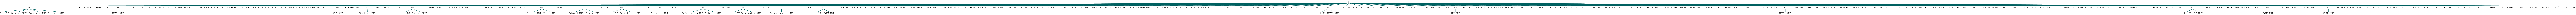

In [135]:
result

In [7]:
named_entities = nltk.chunk.ne_chunk(label_text)

In [8]:
for entity in named_entities:
    if type(entity) == nltk.tree.Tree:
        print(entity)

(ORGANIZATION Natural/NNP Language/NNP Toolkit/NNP)
(ORGANIZATION NLTK/NNP)
(ORGANIZATION NLP/NNP)
(GPE English/NNP)
(GPE Python/NNP)
(PERSON Steven/NNP Bird/NNP)
(PERSON Edward/NNP Loper/NNP)
(ORGANIZATION Department/NNP)
(ORGANIZATION Computer/NNP)
(ORGANIZATION Information/NNP Science/NNP)
(ORGANIZATION University/NNP)
(GPE Pennsylvania/NNP)
(ORGANIZATION NLTK/NNP)
(ORGANIZATION NLTK/NNP)
(ORGANIZATION NLP/NNP)
(ORGANIZATION NLTK/NNP)
(ORGANIZATION US/NNP)
(ORGANIZATION NLTK/NNP)
(ORGANIZATION NLTK/NNP)


### SpaCy in action

[SpaCy](https://github.com/explosion/spaCy) is an open-source application-oriented library in Python. It provides a very efficient statistical system for NER by labeling groups of contiguous tokens. It is able to recognize a wide variety of named or numerical entities. Among them, we can find company-names, locations, product-names, and organizations.

In [13]:
nlp = spacy.load('en_core_web_sm')

In [66]:
 def get_entities(text):
    tags = nlp(text)
    entities = [X.text for X in tags.ents]
    return entities, tags

In [67]:
spacy_tags, sentences = get_entities(wiki_nltk)

In [71]:
for tag in spacy_tags:
    print(tag)

NLTK
NLP
English
Python
Steven Bird
Edward Loper
the Department of Computer and Information Science
the University of Pennsylvania.[5
NLTK
NLTK
NLP
32
US
25
NLTK
NLTK


In [45]:
sentences_full = [x for x in sentences.sents]
sentences_full = "".join(map(str, sentences_full))

In [46]:
displacy.render(nlp(str(sentences_full)), jupyter=True, style='ent')